In [209]:
import serial
import time
import matplotlib.pyplot as plt
import numpy as np
import math

In [210]:
port = '/dev/cu.usbmodem143240'
ser = serial.Serial(port)

In [211]:
def speed(x):
    ser.write(b'speed=' +str(x))
    
def enable_motor():
    ser.write(b'enablemotordriver')
    
def disable_motor():
    ser.write(b'disablemotordriver')

In [212]:
enable_motor()

In [284]:
speed(0)

In [285]:
speed(220)

In [275]:
for x in range(255):
    speed(x)
    time.sleep(0.05)

In [ ]:
min_rev_sec=0.1
max_rev_sec=2.03*2*1.0
steps_per_rev=200
steps=255

revs = [((((max_rev_sec-min_rev_sec)/steps) * x))* (math.log10(0.1*x)+2) + min_rev_sec for x in range(steps)]

ramp = [1/(steps_per_rev*rev) for rev in revs]
ramp_us = [x*1000*1000 for x in ramp]

In [288]:
def write_ramp(ramp):
    for i in range(len(ramp)):
        ex = ramp[i]
        ser.write("setramp=" + str(i).zfill(3) + str(int(ex)).zfill(5))
        time.sleep(0.05)

In [278]:
write_ramp(ramp_us)

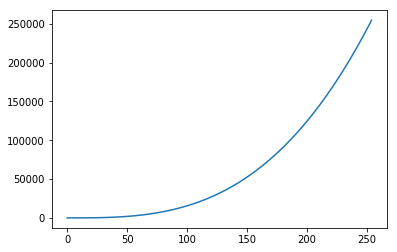

In [295]:
plt.plot(revs)

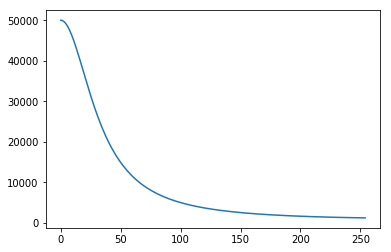

In [238]:
plt.plot(ramp_us)

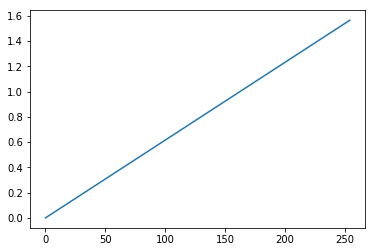

In [154]:
plt.plot([x/float(steps)*(math.pi/2) for x in range(255)])

In [149]:
(x/steps)*(math.pi/2)

0.0